<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Access_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access and plot AROME Arctic weather forecasts

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr 

Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [ ]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

Metadata

In [ ]:
dataset

Find a specific point and plot the forecast.
Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [ ]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [ ]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [ ]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

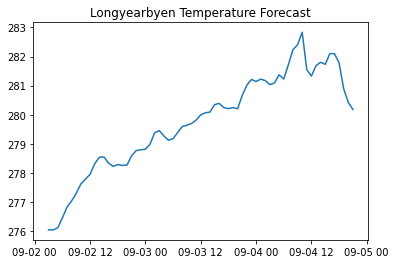

In [ ]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

Plot one forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


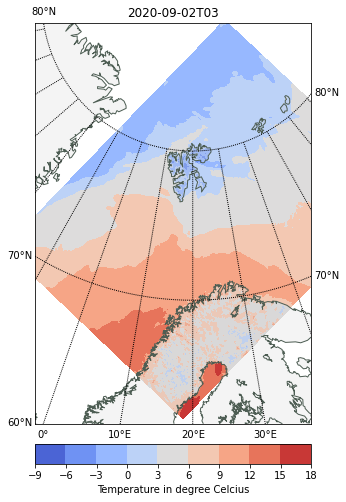

In [ ]:
from mpl_toolkits.basemap import Basemap

timestep=0


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

Explore metedata of other files

In [ ]:
url_pp='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_pp_2_5km_latest.nc'
dataset_pp = xr.open_dataset(url_pp)
url_sfx='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_sfx_2_5km_latest.nc'
dataset_sfx = xr.open_dataset(url_sfx)

In [ ]:
dataset_pp

pp has less variables and coordinated than full. What does "pp" mean?

In [ ]:
dataset

In [ ]:
dataset_sfx #This is from SURFEX

Variables of dataset_sfx seems to be off_shore forecast related? Many strange variables.

Plotting point forecast from PP and FULL

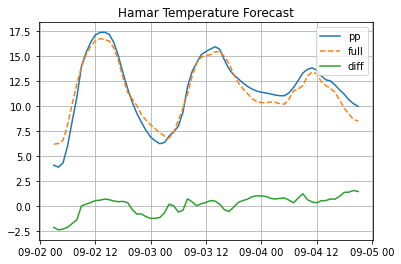

In [ ]:
[ix,jx] = findindex(dataset_pp.latitude,dataset_pp.longitude,60.47,11.40) # Hamar
temp = dataset_pp.air_temperature_2m[:,0,ix,jx]
temp1 = dataset.air_temperature_2m[:,0,ix,jx]

from matplotlib import pyplot as plt

plt.plot(dataset_pp.time, temp-273, '-', label="pp")
plt.plot(dataset.time, temp1-273, '--', label="full")
plt.plot(dataset.time,temp-temp1, label="diff")
plt.legend(), plt.grid()
plt.title("Hamar Temperature Forecast")
plt.show()

Plotting point forecast from SFX

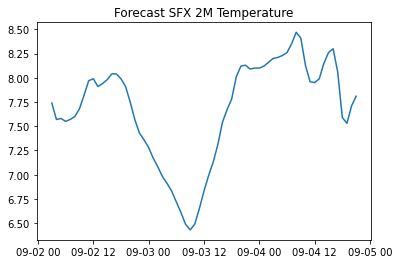

In [ ]:
[ix,jx] = findindex(dataset_sfx.latitude,dataset_sfx.longitude,65,65) # Somewhere
temp = dataset_sfx.T2M_SEA[:,ix,jx]
from matplotlib import pyplot as plt

plt.plot(dataset_sfx.time, temp-273, '-')

plt.title("Forecast SFX 2M Temperature")
plt.show()

## Plotting wind and temperature forecast for February 04 00:00 UTC for Tromsø 

Point forecast


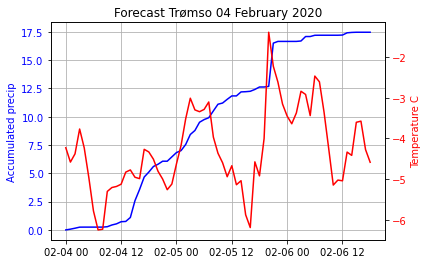

In [102]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2020/02/04/arome_arctic_full_2_5km_20200204T00Z.nc'
dataset_arc = xr.open_dataset(url)

[ix,jx] = findindex(dataset_sfx.latitude,dataset_sfx.longitude,69.66,18.95) #Tromsø
precip = dataset_arc.precipitation_amount_acc[:,0,ix,jx]
temp = dataset_arc.air_temperature_2m[:,0,ix,jx]

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.set_ylabel('Accumulated precip',color='b')
ax.plot(dataset_arc.time,precip,color='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.grid()
ax1 = ax.twinx()
ax1.set_ylabel('Temperature C',color='r')
ax1.plot(dataset_arc.time,temp-273,color='red')
ax1.tick_params(axis='y',labelcolor='red')
plt.title("Forecast Trømso 04 February 2020")
plt.show()

Map forecast

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'extemd'


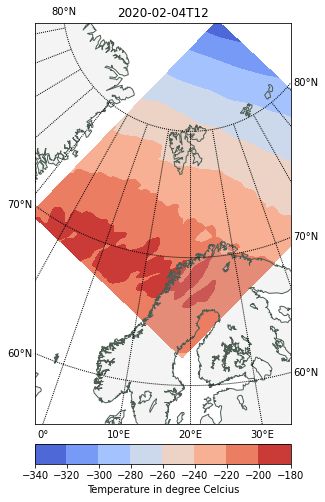

In [103]:
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/2020/02/04/arome_arctic_full_2_5km_20200204T12Z.nc'
dataset = xr.open_dataset(url)

from mpl_toolkits.basemap import Basemap

timestep=0


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 55.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

#try:
cs=m.contourf(x,y,np.array( dataset.x_wind_ml[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
#except ValueError:
#  pass
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

# Access and plot AROME MetCoOp and ECMWF IFS forecasts
Example for an extreme precipitation event in October 2014 in West Norway

Specify input fields: AROME MetCoOp and ECMWF IFS forecasts

In [104]:
day='26'; month='10'; year='2014'; HH='12'

url='https://thredds.met.no/thredds/dodsC/aromemetcoopstarc/'+str(year)+'/'+str(month)+'/'+str(day)+'/AROME_MetCoOp_'+str(HH)+'_fp.nc_'+str(year)+str(month)+str(day)
arome = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_'+str(year)+str(month)+str(day)+'T'+str(HH)+'Z.nc'
ecifs =  xr.open_dataset(url)

# Find a specific point and plot the forecast.
Note AROME MetCoOp is on an irregular grid, so the xarray.sel functionality does not work. But it does work for the ECMWF IFS grid (see below)

In [105]:
lat0=60.3833; lon0=5.9500 # Kvamskogen in Western Norway

[ix,jx] = findindex(arome.latitude,arome.longitude,lat0,lon0) # from regional model AROME MetCoOp


The ECMWF IFS precipitation is subdivided into large scale or stratiform precipitation (LSP) and convective precipitation (TP-LSP)

In [ ]:
ecifs